<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Science Immersive - Capstone Project

---

# Predicting delayed flights and improving operational performance  

## 02. Exploratory Data Analysis  
<br/><br/>


***

## Table of Contents

* [3. Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
    * [3.1 Import libraries and data](#3.1-Import-libraries-and-data)
    * [3.2 Heatmaps and correlations](#3.2-Heatmaps-and-correlations)
    * [3.3 Box Plots and ranges](#3.3-Box-Plots-and-ranges)
    * [3.4 Total flights and time](#3.4-Total-flights-and-time)
    * [3.5 Flight delays and time](#3.5-Flight-delays-and-time)
    * [3.6 Flight delays and airlines](#3.6-Flight-delays-and-airlines)
    * [3.7 Flight delays and countries](#3.7-Flight-delays-and-countries)
    * [3.8 Flight delays and weather](#3.8-Flight-delays-and-weather)  
<br/><br/>


***

# 3. Exploratory Data Analysis

### 3.1 Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
# run to avoid warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set(font_scale=0.8)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# load the data from CSV for consistency reasons
df = pd.read_csv('datasets/mod/df_01.csv', low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195293 entries, 0 to 195292
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  195293 non-null  object 
 1   year                  195293 non-null  int64  
 2   month                 195293 non-null  int64  
 3   day                   195293 non-null  int64  
 4   weekday               195293 non-null  int64  
 5   hour                  195293 non-null  int64  
 6   departing             195293 non-null  float64
 7   terminal_num          135429 non-null  object 
 8   airline_code          184132 non-null  object 
 9   airline_name          183940 non-null  object 
 10  aircraft_type_code    137357 non-null  object 
 11  aircraft_type_name    137357 non-null  object 
 12  service_type          195293 non-null  object 
 13  domestic              195293 non-null  float64
 14  cancelled             195293 non-null  float64
 15  

In [6]:
# display the size of the dataframe
df.shape

(195293, 40)

In [7]:
# display summary statistics for the numerical features
df.describe()

,year,month,day,weekday,hour,departing,domestic,cancelled,regular,CIS_country,...,load_factor,baggage_weight,mail_weight,temperature,relative_humidity,apparent_temperature,precipitation,weather_code,wind_speed,delayed
count,195293.0,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,...,182447.000000,121086.000000,82958.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000,195293.000000
mean,2013.0,7.246266,16.024609,3.009345,13.410388,0.502000,0.593682,0.000456,0.917590,0.106164,...,81.163451,1134.466371,50.708612,9.103383,78.248683,6.827355,0.084761,11.385155,11.967680,0.170308
std,0.0,3.082975,8.765956,2.002745,6.164239,0.499997,0.491146,0.021343,0.274988,0.308048,...,41.278123,1015.762045,140.169544,9.662356,15.507387,11.554376,0.317358,21.362831,5.552934,0.375904
min,2013.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-25.200000,29.000000,-32.900000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,5.000000,9.000000,1.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,66.026000,458.000000,0.000000,2.200000,67.000000,-1.600000,0.000000,1.000000,7.700000,0.000000
50%,2013.0,7.000000,16.000000,3.000000,14.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,89.474000,887.000000,0.000000,10.200000,82.000000,7.500000,0.000000,2.000000,11.400000,0.000000
75%,2013.0,10.000000,24.000000,5.000000,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,100.000000,1512.000000,23.000000,17.000000,91.000000,16.100000,0.000000,3.000000,15.500000,0.000000
max,2013.0,12.000000,31.000000,6.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,13800.000000,29117.000000,3842.000000,30.600000,100.000000,34.500000,5.600000,73.000000,37.800000,1.000000


In [8]:
# define different typologies of variables
continuous_vars = ['pax_total', 'pax_1', 'pax_2', 'pax_3', 'pax_4', 'pax_5', 'pax_6', 'load_factor', 'baggage_weight',
                   'mail_weight', 'temperature', 'relative_humidity', 'apparent_temperature', 'precipitation',
                   'wind_speed']

discrete_vars = ['date', 'month', 'day', 'weekday', 'hour']

ordinal_vars = []

nominal_vars = ['terminal_num', 'airline_code', 'airline_name', 'aircraft_type_code', 'aircraft_type_name',
                'service_type', 'country_name', 'flight_number', 'main_delay_code', 'source_delay', 'runway',
                'spot_number', 'weather_code']

binary_vars = ['departing', 'domestic', 'cancelled', 'regular', 'CIS_country']

quant_vars = continuous_vars + discrete_vars

categ_vars = ordinal_vars + nominal_vars + binary_vars

delay = ['delayed']

# the variable 'year' has been excluded because it only contains one value

In [9]:
print('TYPOLOGIES OF VARIABLES')
print('Continuous variables:', len(continuous_vars))
print('Discrete variables:  ', len(discrete_vars))
print('Ordinal variables:   ', len(ordinal_vars))
print('Nominal variables:   ', len(nominal_vars))
print('Binary variables:    ', len(binary_vars))

TYPOLOGIES OF VARIABLES
Continuous variables: 15
Discrete variables:   5
Ordinal variables:    0
Nominal variables:    13
Binary variables:     5


### 3.2 Heatmaps and correlations

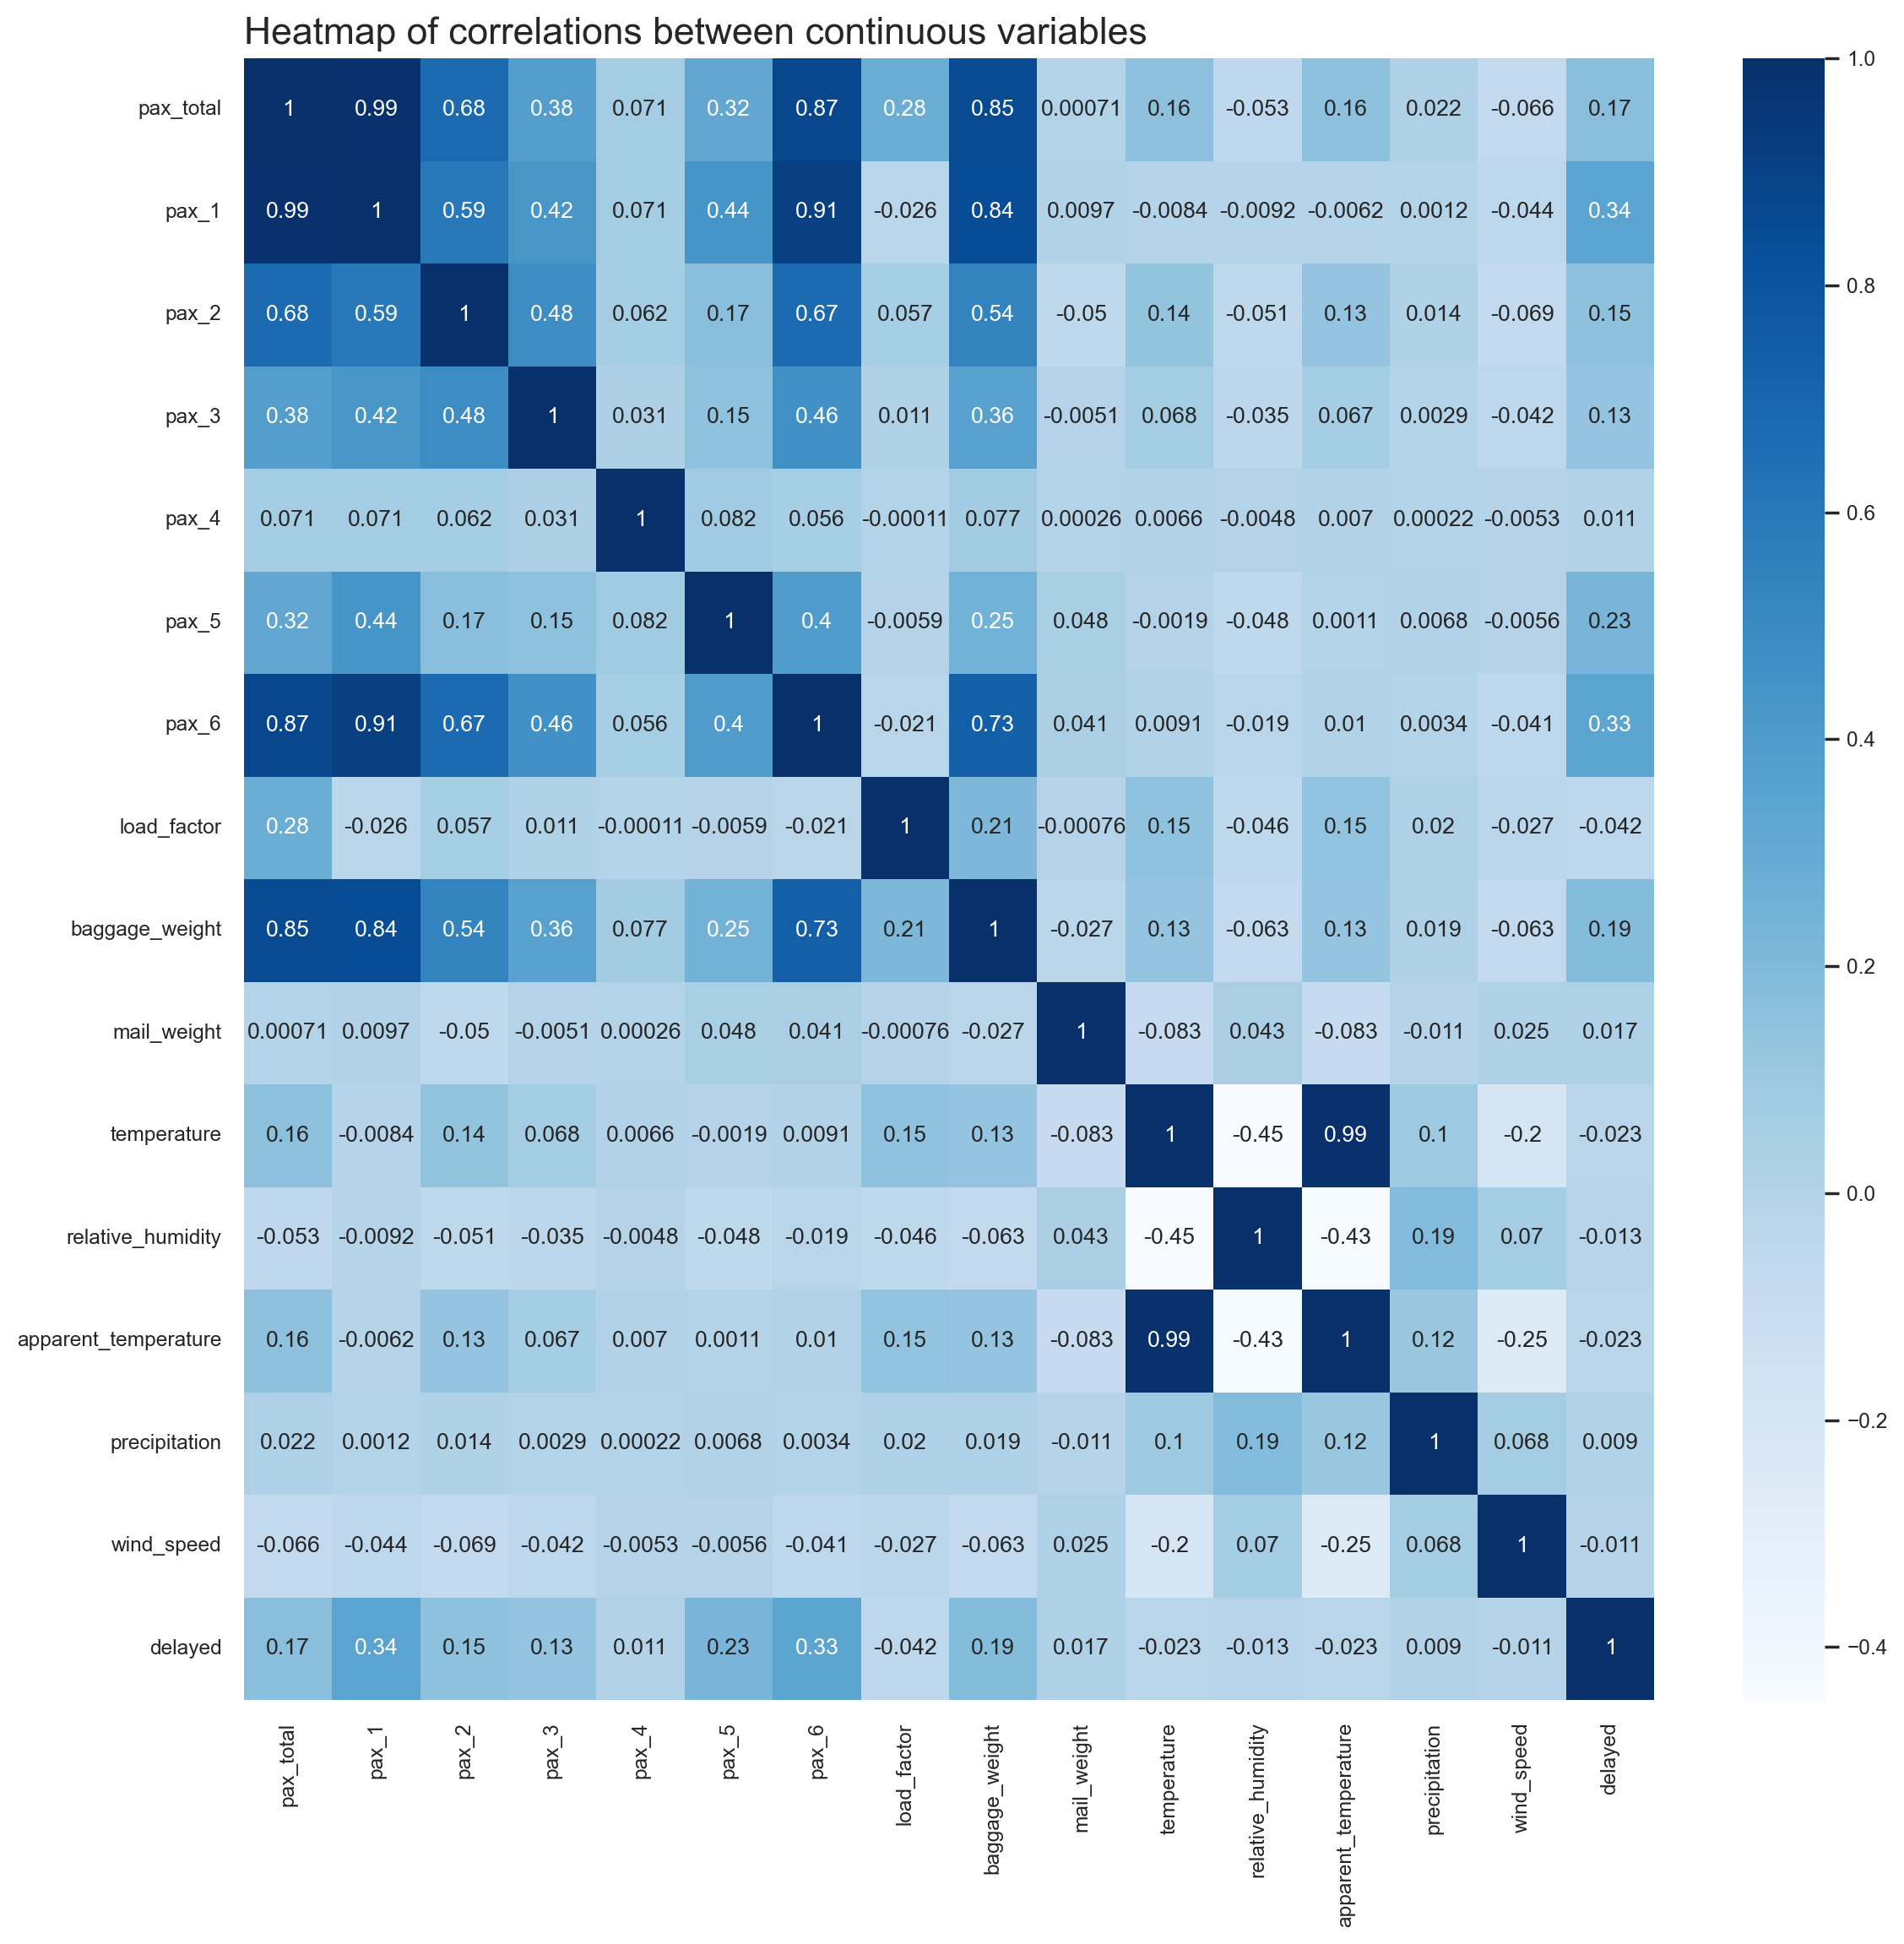

In [10]:
# create heatmap to explore correlations between continuous variables and delay
plt.figure(figsize=(12, 12))
plt.title('Heatmap of correlations between continuous variables', loc='left', fontsize = 16)
sns.heatmap(df[continuous_vars+delay].corr(), cmap='Blues', annot=True)
plt.show()

In [11]:
# define subtypology of variables
cont_vars_sub = ['pax_1', 'pax_6', 'pax_5', 'baggage_weight']

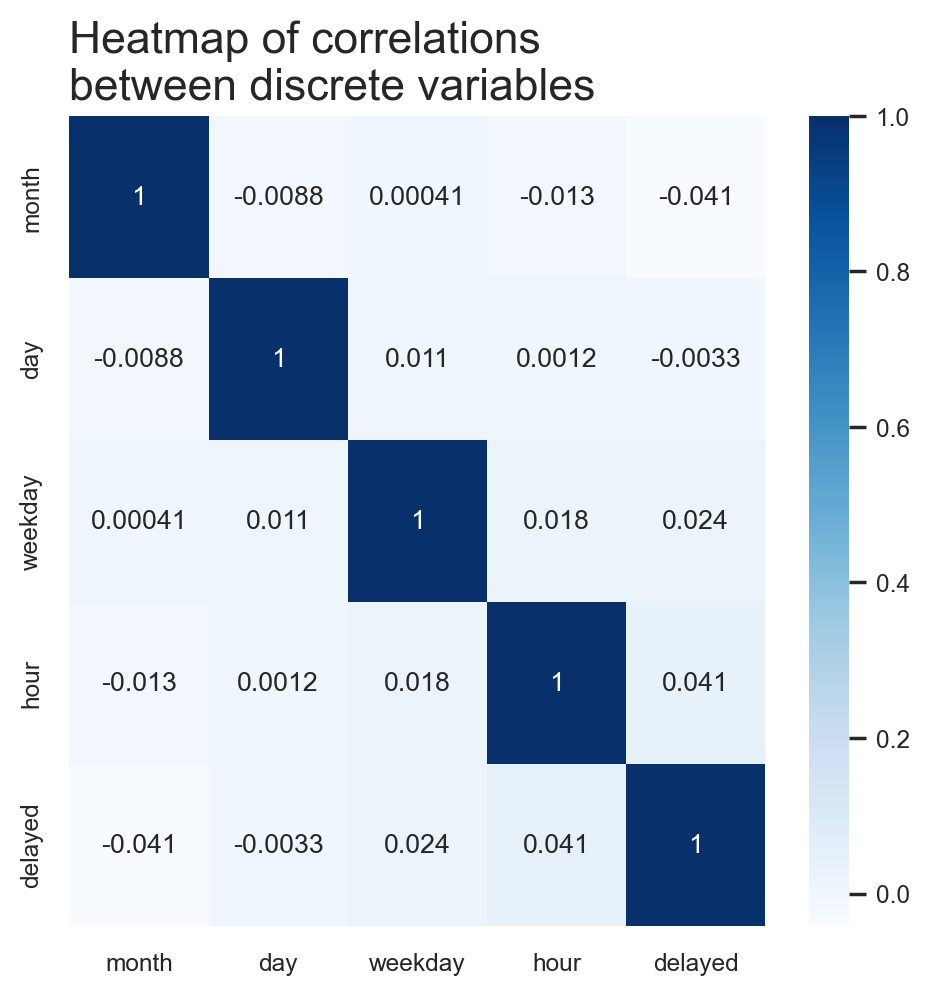

In [12]:
# create heatmap to explore correlations between discrete variables and delay
plt.figure(figsize=(5, 5))
plt.title('Heatmap of correlations \nbetween discrete variables', loc='left', fontsize = 16)
sns.heatmap(df[discrete_vars+delay].corr(), cmap='Blues', annot=True)
plt.show()

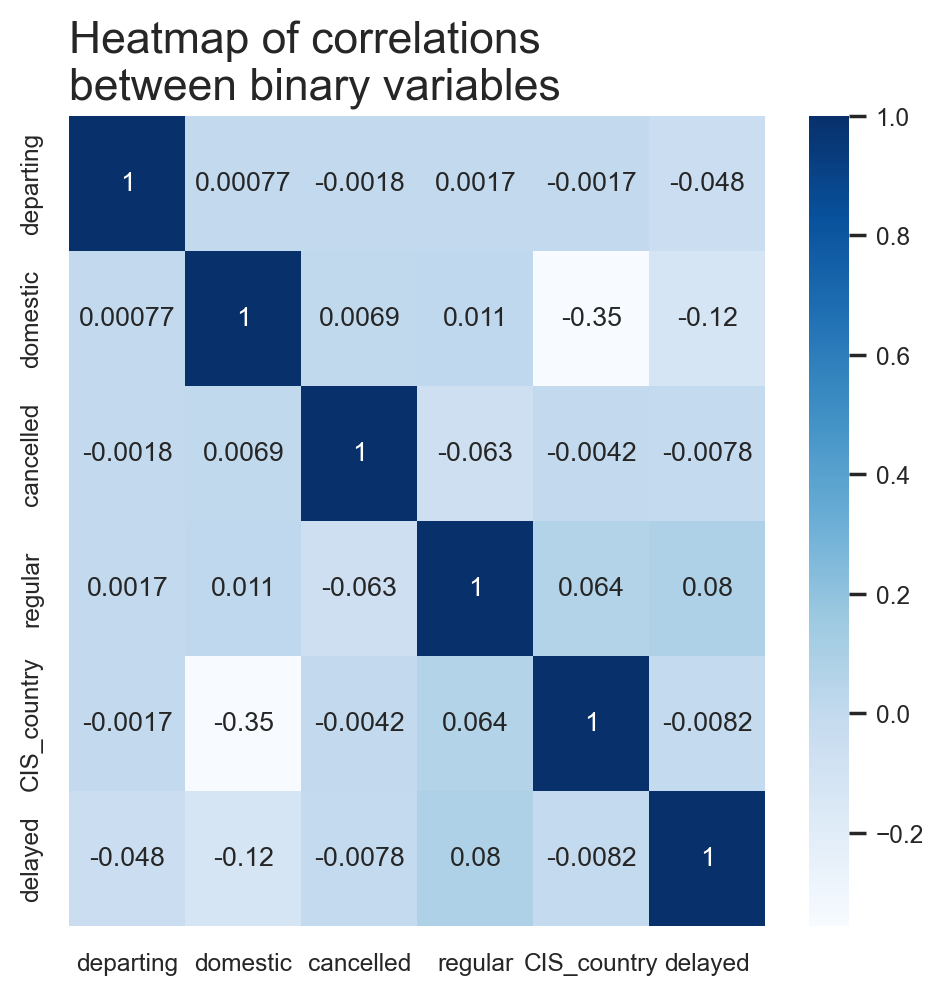

In [13]:
# create heatmap to explore correlations between binary variables and delay
plt.figure(figsize=(5, 5))
plt.title('Heatmap of correlations \nbetween binary variables', loc='left', fontsize = 16)
sns.heatmap(df[binary_vars+delay].corr(), cmap='Blues', annot=True)
plt.show()

There are not meaningful correlations between the different variables and the delay.  
<br/><br/>


In [14]:
# define a function that standardise the variables
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

In [ ]:
# create dataframe with continuous, discrete and binary variables standardised
df_stand = var_standardized(df[continuous_vars+discrete_vars+binary_vars])

In [ ]:
df_stand

### 3.3 Box Plots and ranges

In [ ]:
# create box plots of continuous variables to understand the different ranges
fig, ax = plt.subplots(figsize=(15, 15))
plt.title('Box Plots of continuous variables', loc='left', fontsize = 16)
sns.boxplot(data=df_stand[continuous_vars], orient='h', fliersize=5,
            linewidth=1.5, notch=False, saturation=0.5, ax=ax)
plt.xscale('symlog')
plt.autoscale(True)
plt.show()

In [ ]:
# check for missing values
df[df.isnull().sum(axis=1)>0]

Some variables show a large amount of **outliers**, I am going to keep them because I don't have enough information about the data.  
At this stage every row has some **null values**, I am going to keep them for the EDA stage.  
Some columns are going to be dropped entirely in the modelling stage, while for some others I am going to remove the rows.  

<br/><br/>

In [ ]:
flights = df.groupby('delayed')[['delayed']].count()
flights

In [ ]:
flights.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Total Flights and Delays', loc='left', fontsize = 15)
plt.ylabel('Delay', fontsize = 12)
plt.xlabel('Count', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

### 3.4 Total flights and time

In [ ]:
# display the average number of flights during the year - grouped by delay
tot_month = df.groupby(['month', 'delayed'])[['delayed']].count()
tot_month

In [ ]:
# create bar plot showing flight count per month
tot_month.unstack().plot(kind='bar', rot=0, figsize=(6,6))
plt.title('Total Flights per Month', loc='left', fontsize = 15)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Month', fontsize = 12)

legend_labels = ['On-time', 'Delayed']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

Flights are most frequent in **August** and least frequent in **February** during the year.  
On-time flights are most frequent in August and least frequent in February.  
Delayed flights are most frequent in June and least frequent in February.  


<br/><br/>

In [ ]:
# display the average number of flights during the week - grouped by delay
tot_day = df.groupby(['weekday', 'delayed'])[['delayed']].count()
avg_day = tot_day / 52.14285
avg_day

In [ ]:
# create bar plot showing flight count per weekday
avg_day.unstack().plot(kind='bar', rot=0, figsize=(4,6))
plt.title('Average Flights per Weekday', loc='left', fontsize = 15)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Weekday', fontsize = 12)

legend_labels = ['On-time', 'Delayed']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

On average, flights are most frequent on **Friday** and least frequent on **Tuesday** during the week.  
On-time flights are most frequent on Friday and least frequent on Saturday.  
Delayed flights are most frequent on Friday and least frequent on Tuesday.  


<br/><br/>

In [ ]:
# display the average number of flights during the day - grouped by delay
tot_hour = df.groupby(['hour', 'delayed'])[['delayed']].count()
avg_hour = tot_hour / 365
avg_hour

In [ ]:
# create bar plot showing flight count per hour
avg_hour.unstack().plot(kind='bar', rot=0, figsize=(12,6))
plt.title('Average Flights per Hour', loc='left', fontsize = 15)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hour', fontsize = 12)

legend_labels = ['On-time', 'Delayed']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

On average, flights are most frequent at **16:00** and least frequent at **03:00** during the day.  
On-time flights are most frequent at 10:00 and least frequent at 03:00.  
Delayed flights are most frequent at 17:00 and least frequent at 05:00.  


<br/><br/>

In [ ]:
# create subsets of dataframe using conditions
delay = df[df.delayed == 1]
nodelay = df[df.delayed == 0]

### 3.5 Flight delays and time

In [ ]:
# display the month of the year with most delays in absolute terms
month_abs = delay.groupby('month').count().sort_values(by='delayed', ascending=False)[['delayed']]
month_abs

In [ ]:
# display the month of the year with most delays in absolute terms - grouped by direction
month_abs = delay.groupby(['month', 'departing'])[['delayed']].count()
month_abs

In [ ]:
# create bar plot showing absolute flight delays by month
month_abs.unstack().plot(kind='bar', rot=0, figsize=(6,6))
plt.title('Flight Delays by Month - Absolute', loc='left', fontsize = 15)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Month', fontsize = 12)

legend_labels = ['Arriving', 'Departing']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

In absolute terms, **June** has the most total delays during the year, while **February** has the least.  
For arriving flights, June shows slightly more delays compared to other months, while February shows slightly less delays.  
For departing flights, September shows slightly more delays compared to other months, while February shows slightly less delays.  


<br/><br/>

In [ ]:
# display the month of the year with most delays relatively to the total number of flights
month_rel = month_abs / df.groupby('month').count()[['delayed']]
month_rel.sort_values(by='delayed', ascending=False)

In [ ]:
# create bar plot showing relative flight delays by month
month_rel.unstack().plot(kind='bar', rot=0, figsize=(6,6))
plt.title('Flight Delays by Month - Relative', loc='left', fontsize = 15)
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Month', fontsize = 12)

legend_labels = ['Arriving', 'Departing']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

In relative terms, **January** has the most total delays during the year, while **November** has the least.  
For arriving flights, March shows slightly more delays compared to other months, while November shows slightly less delays.  
For departing flights, January shows slightly more delays compared to other months, while November shows slightly less delays.  


<br/><br/>

In [ ]:
# display the day of the week with most delays in absolute terms (0 is for Monday)
day_abs = delay.groupby('weekday').count().sort_values(by='delayed', ascending=False)[['delayed']]
day_abs

In [ ]:
# display the day of the week with most delays in absolute terms (0 is for Monday) - grouped by direction
day_abs = delay.groupby(['weekday', 'departing'])[['delayed']].count()
day_abs

In [ ]:
# create bar plot showing absolute flight delays by weekday
day_abs.unstack().plot(kind='bar', rot=0, figsize=(4,6))
plt.title('Flight Delays by Weekday - Absolute', loc='left', fontsize = 15)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Weekday', fontsize = 12)

legend_labels = ['Arriving', 'Departing']
plt.legend(labels = legend_labels, loc = 'upper left')

plt.show()

In absolute terms, **Friday** has the most total delays during the week, while **Tuesday** has the least.  
For arriving flights, Friday shows slightly more delays compared to other days, while Tuesday shows slightly less delays.  
For departing flights, Friday shows significantly more delays compared to other days, while Tuesday shows slightly less delays.  


<br/><br/>

In [ ]:
# display the day of the week with most delays relatively to the total number of flights
day_rel = day_abs / df.groupby('weekday').count()[['delayed']]
day_rel.sort_values(by='delayed', ascending=False)

In [ ]:
# create bar plot showing relative flight delays by weekday
day_rel.unstack().plot(kind='bar', rot=0, figsize=(4,6))
plt.title('Flight Delays by Weekday - Relative', loc='left', fontsize = 15)
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Weekday', fontsize = 12)

legend_labels = ['Arriving', 'Departing']
plt.legend(labels = legend_labels, loc = 'upper left')

plt.show()

In relative terms, **Saturday** has the most total delays during the week, while **Tuesday** has the least.  
For arriving flights, Saturday shows slightly more delays compared to other days, while Tuesday shows slightly less delays.  
For departing flights, Friday shows slightly more delays compared to other days, while Tuesday shows slightly less delays.  


<br/><br/>

In [ ]:
# display the time of the day with most delays in absolute terms
time_abs = delay.groupby('hour').count().sort_values(by='delayed', ascending=False)[['delayed']]
time_abs

In [ ]:
# display the time of the day with most delays in absolute terms - grouped by direction
time_abs = delay.groupby(['hour', 'departing'])[['delayed']].count()
time_abs

In [ ]:
# create bar plot showing absolute flight delays by hour
time_abs.unstack().plot(kind='bar', rot=0, figsize=(12,6))
plt.title('Flight Delays by Hour - Absolute', loc='left', fontsize = 15)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hour', fontsize = 12)

legend_labels = ['Arriving', 'Departing']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

In absolute terms, **17:00** has the most total delays during the day, while **05:00** has the least.  
For arriving flights, 16:00 shows slightly more delays compared to other hours, while 05:00 shows slightly less delays.  
For departing flights, 17:00 shows significantly more delays compared to other hours, while 05:00 shows slightly less delays.  


<br/><br/>

In [ ]:
# display the time of the day with most delays relatively to the total number of flights
time_rel = time_abs / df.groupby('hour').count()[['delayed']]
time_rel.sort_values(by='delayed', ascending=False)

In [ ]:
# create bar plot showing relative flight delays by hour
time_rel.unstack().plot(kind='bar', rot=0, figsize=(12,6))
plt.title('Flight Delays by Hour - Relative', loc='left', fontsize = 15)
plt.ylabel('Percentage', fontsize = 12)
plt.xlabel('Hour', fontsize = 12)

legend_labels = ['Arriving', 'Departing']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

In relative terms, **03:00** has the most total delays during the day, while **06:00** has the least.  
For arriving flights, 03:00 shows significantly more delays compared to other hours, while 06:00 shows significantly less delays.  
For departing flights, 17:00 shows slightly more delays compared to other hours, while 06:00 shows slightly less delays.


<br/><br/>

### 3.6 Flight delays and airlines

In [ ]:
# display the airline with most delays in absolute terms
airline_abs = delay.groupby('airline_name').count().sort_values(by='delayed', ascending=False)[['delayed']]
airline_abs

In [ ]:
# display the airline with most delays relatively to the total number of flights
airline_rel = airline_abs / df.groupby('airline_name').count()[['delayed']]
airline_rel.sort_values(by='delayed', ascending=False)

In [ ]:
# create horizontal bar plot showing relative flight delays by airline
airline_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Airline', loc='left', fontsize = 15)
plt.ylabel('Airline', fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

**ATLASJET** and **TULPAR AIR** have relatively the most delays among the airlines.  
All of their flights are delayed, which is probably due to a low number of observations.  

<br/><br/>

In [ ]:
# display the aircraft type with most delays in absolute terms
aircraft_abs = delay.groupby(['aircraft_type_name','aircraft_type_code']).count().sort_values(by='delayed',
               ascending=False)[['delayed']]
aircraft_abs

In [ ]:
# display the aircraft type with most delays relatively to the total number of flights
aircraft_rel = aircraft_abs / df.groupby(['aircraft_type_name','aircraft_type_code']).count()[['delayed']]
aircraft_rel.sort_values(by='delayed', ascending=False)

In [ ]:
# create a horizontal bar plot showing relative flight delays by aircraft type
aircraft_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Aircraft Type', loc='left', fontsize = 15)
plt.ylabel('Aircraft Type', fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

**AEROSPATIALE/ALENIA AT4** has relatively the most delays among the aircraft types.  
All of its flights are delayed, which is probably due to a low number of observations.  
  
  <br/><br/>

In [ ]:
# display the service type with most delays in absolute terms
service_abs = delay.groupby('service_type').count().sort_values(by='delayed', ascending=False)[['delayed']]
service_abs

In [ ]:
# display the service type with most delays relatively to the total number of flights
service_rel = service_abs / df.groupby('service_type').count()[['delayed']]
service_rel.sort_values(by='delayed', ascending=False)

In [ ]:
# create a horizontal bar plot showing relative flight delays by service type
service_rel.sort_values(by='delayed', ascending=False).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Service Type', loc='left', fontsize = 15)
plt.ylabel('Service Type', fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

**Passenger Only - Charter** has relatively the most delays among the service types, while some categories have no delay at all.  

<br/><br/>

### 3.7 Flight delays and countries

In [ ]:
# display the country to which the flight is directed with most delays in absolute terms
country_dep_abs = df[(df.delayed == 1) & (df.departing == 1)].groupby('country_name').count().sort_values(by='delayed',
                  ascending=False)[['delayed']]
country_dep_abs

In [ ]:
# display the country to which the flight is directed with the most delays relatively to the total number of flights
country_dep_rel = country_dep_abs / df[df.departing == 1].groupby('country_name').count()[['delayed']]
country_dep_rel.sort_values(by='delayed', ascending=False)

In [ ]:
# create a horizontal bar plot showing the relative flight delays by country of destination
country_dep_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Country of Destination', loc='left', fontsize = 15)
plt.ylabel('Country', fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

Flights departing to **Georgia** have relatively the most delays.  
All of its flights are delayed, which is probably due to a low number of observations.  
  
  
<br/><br/>

In [ ]:
# display the country from which the flight arrived with most delays in absolute terms
country_arr_abs = df[(df.delayed == 1) & (df.departing == 0)].groupby('country_name').count().sort_values(by='delayed',
                  ascending=False)[['delayed']]
country_arr_abs

In [ ]:
# display the country from which the flight arrived with the most delays relatively to the total number of flights
country_arr_rel = country_arr_abs / df[df.departing == 0].groupby('country_name').count()[['delayed']]
country_arr_rel.sort_values(by='delayed', ascending=False)

In [ ]:
# create a horizontal bar plot showing the relative flight delays by country of arrival
country_arr_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Country of Arrival', loc='left', fontsize = 15)
plt.ylabel('Country', fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

Flights arriving from **Netherlands** has relatively the most delays.  
This could be reflected in the fact that Netherlands is the European country with relatively the most delays.  


<br/><br/>

In [ ]:
# display the spot number with most delays in absolute terms
spot_abs = delay.groupby('spot_number').count().sort_values(by='delayed', ascending=False)[['delayed']]
spot_abs

In [ ]:
# display the spot number with most delays relatively to the total number of flights
spot_rel = spot_abs / df.groupby('spot_number').count()[['delayed']]
spot_rel.sort_values(by='delayed', ascending=False)

In [ ]:
# create a horizontal bar plot showing the relative flight delays by apron spot number
spot_rel.sort_values(by='delayed', ascending=False).head(25).plot(kind='barh', rot=0, figsize=(12,12))
plt.title('Flight Delays by Apron Spot Number', loc='left', fontsize = 15)
plt.ylabel('Spot Number', fontsize = 12)
plt.xlabel('Percentage', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

Apron Spot **93** has relatively the most delays among the apron spot numbers.  
This information would be more useful when linked to the airfield plan.  

<br/><br/>

In [ ]:
# display the average number of passengers for delayed and on-time flights
pax = df.groupby('delayed')[['pax_total']].mean()
pax

In [ ]:
# create a horizontal bar plot showing the average number of passengers for delayed and on-time flights
pax.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Passengers', loc='left', fontsize = 15)
plt.ylabel('Delay', fontsize = 12)
plt.xlabel('Average Passengers Number', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

**Delayed flights** have a significantly higher average number of passengers than on-time flights.  
This makes sense from an operational point of view, because a crowded flight (and related departure gate) is more likely to be delayed.  

<br/><br/>

In [ ]:
# display the average load factor for delayed and on-time flights
lf = df.groupby('delayed')[['load_factor']].mean()
lf

In [ ]:
# create a horizontal bar plot showing the average load factor for delayed and on-time flights
lf.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Load Factor', loc='left', fontsize = 15)
plt.ylabel('Delay', fontsize = 12)
plt.xlabel('Average Load Factor', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

**On-time flights** have higher average load factor than delayed flights.  
This does not make sense from an operational point of view.  


<br/><br/>

In [ ]:
# display the average baggage weight for delayed and on-time flights
bag = df.groupby('delayed')[['baggage_weight']].mean()
bag

In [ ]:
# create a horizontal bar plot showing the average baggage weight for delayed and on-time flights
bag.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Baggage Weight', loc='left', fontsize = 15)
plt.ylabel('Delay', fontsize = 12)
plt.xlabel('Average Baggage Weight', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

**Delayed flights** have significantly higher average baggage weight than on-time flights.  
This makes sense from an operational point of view, because more baggage weight can increase airfield operations resulting in the flight being delayed.  

<br/><br/>

### 3.8 Flight delays and weather

In [ ]:
# display the average precipitation for delayed and on-time flights
precip = df.groupby('delayed')[['precipitation']].mean()
precip

In [ ]:
# create a horizontal bar plot showing the average precipitation for delayed and on-time flights
precip.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Precipitation', loc='left', fontsize = 15)
plt.ylabel('Delay', fontsize = 12)
plt.xlabel('Average Precipitation', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

**Delayed flights** have higher average precipitation than on-time flights.  
This makes sense from an operational point of view, especially for flights not using skybridges.  
<br/><br/>

In [ ]:
# display the most common weather code for delayed and on-time flights
wcode = df.groupby(['weather_code', 'delayed'])[['weather_code']].count()
wcode

In [ ]:
# create a bar plot showing the most common weather code for delayed and on-time flights
wcode.unstack().plot(kind='bar', rot=0, figsize=(8,4))
plt.title('Flight Delays and Weather Code', loc='left', fontsize = 15)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Weather Code', fontsize = 12)

legend_labels = ['On-time', 'Delayed']
plt.legend(labels = legend_labels, loc = 'upper right')

plt.show()

Both delayed and on-time flights have **3** as the most common weather code, which stands for 'Cloudy'.  

<br/><br/>

In [ ]:
# display the average wind speed for delayed and on-time flights
wind = df.groupby('delayed')[['wind_speed']].mean()
wind

In [ ]:
# create a horizontal bar plot showing the average wind speed for delayed and on-time flights
wind.plot(kind='barh', rot=0, figsize=(6,1))
plt.title('Flight Delays and Wind Speed', loc='left', fontsize = 15)
plt.ylabel('Delay', fontsize = 12)
plt.xlabel('Average Wind Speed', fontsize = 12)

plt.legend('', frameon=False)

plt.show()

**On-time flights** have slightly higher average wind speed than non-delayed flights.  

<br/><br/>

### Conclusions from EDA

Exploratory Data Analysis shows that there are no meaningful correlations between the different variables and the delay.  
Some variables show a large amount of outliers, but there are not enough information about the data.  
Delays account for roughly 17% of total flights, which is in line with industry average.  
  
  
Flights are most frequent in August and least frequent in February during the year, showing a clear seasonality over the summer months.  
On average, flights are most frequent on Fridays and least frequent on Tuesdays during the week, with the daily peak being at 16:00 and the lowest at 03:00.  
  
  
In absolute terms, June has the most total delays during the year, while February has the least.  
In relative terms, January has the most total delays during the year, while November has the least.  
In absolute terms, Friday has the most total delays during the week, while Tuesday has the least.  
In relative terms, Saturday has the most total delays during the week, while Tuesday has the least.  

<br/><br/>



